In [1]:
import matplotlib.pyplot as plt
import os
from common.lang import Lang,LangType
import pandas as pd
import cv2


outdir = 'out/img'
lang_type = LangType.en_us



lang = Lang(lang_type=lang_type)
t = lang.t
font_map = {
    LangType.zh_cn:'KaiTi', # SimHei
    LangType.en_us:'Times New Roman'
}
plt.rcParams['font.sans-serif'] = font_map[lang_type]
plt.rcParams['axes.unicode_minus'] = False
os.makedirs(outdir, exist_ok=True)



In [ ]:
# 心率图例
lang.add_map(LangType.zh_cn,{
        'static':'静止',
        'walk':'走路',
        'run':'跑步',
        'motion_type':'运动类型',
        'heart_rate':'心率'
    }).add_map(LangType.en_us,{
        'static':'Static',
        'walk':'Walk',
        'run':'Run',
        'motion_type':'motion type',
        'heart_rate':'heart rate'
    })
heart_rate_data = {
    t('static'): [60, 65, 70, 72, 75, 78, 80, 82, 85],
    t('walk'): [80, 82, 85, 88, 90, 92, 95, 98, 100],
    t('run'): [110, 125, 130, 135, 115, 145, 120, 155, 160],
}
labels = list(heart_rate_data.keys())
data = list(heart_rate_data.values())

plt.boxplot(data, labels=labels)

plt.xlabel(t('motion_type'))
plt.ylabel(t('heart_rate'))

plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

plt.savefig(f"{outdir}/heart_rate.svg",transparent=True)
plt.show()
plt.clf()


In [ ]:
# 肤色图例
import matplotlib.pyplot as plt
import numpy as np
lang.add_map(LangType.zh_cn,{
        'count':'数量',
        'colour_of_skin':'肤色区间',
    }).add_map(LangType.en_us,{
        'count':'Count',
        'colour_of_skin':'Colour of  Skin',
    })
mean_skin_color = 150  # 均值
std_dev_skin_color = 30  # 标准差
num_samples = 1000  # 样本数量

skin_color_data = np.random.normal(mean_skin_color, std_dev_skin_color, num_samples)
skin_color_data = np.clip(skin_color_data, 60, 240)

bins = np.arange(60, 241, 30)  # 分成6个区间，每个区间宽度为30

plt.hist(skin_color_data, bins=bins, color='skyblue', edgecolor='black', alpha=1)


plt.xlabel(t('colour_of_skin'))
plt.ylabel(t('count'))

plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

plt.savefig(f"{outdir}/colour_of_skin.svg",transparent=True)
# 显示图表
plt.show()
plt.clf()


In [ ]:
# 文件名列表
frame = 215
file_names = [
    ('qp',0),('qp',5),('qp',15),('qp',25),('qp',35),
    ('crf',0),('crf',5),('crf',15),('crf',25),('crf',35),
]
# 创建画布和子图
fig, axes = plt.subplots(2, 5, figsize=(14, 6))

# 遍历文件名列表并绘制图像
for i, file_name in enumerate(file_names):
    row = i // 5
    col = i % 5
    img = plt.imread(f'out/img/diff/h264/{file_name[0]}__{file_name[1]}_{frame}.png')  # 读取图像
    axes[row, col].imshow(img)
    axes[row, col].axis('off')  # 去除坐标轴
    axes[row, col].set_title(f'{"CRF" if file_name[0] == "crf" else "CQP"}={file_name[1]}')  # 添加子标题


# 调整水平间距
plt.tight_layout(h_pad=1.5)
plt.savefig(f"{outdir}/diff.svg",transparent=True)
# 显示图像

plt.show()


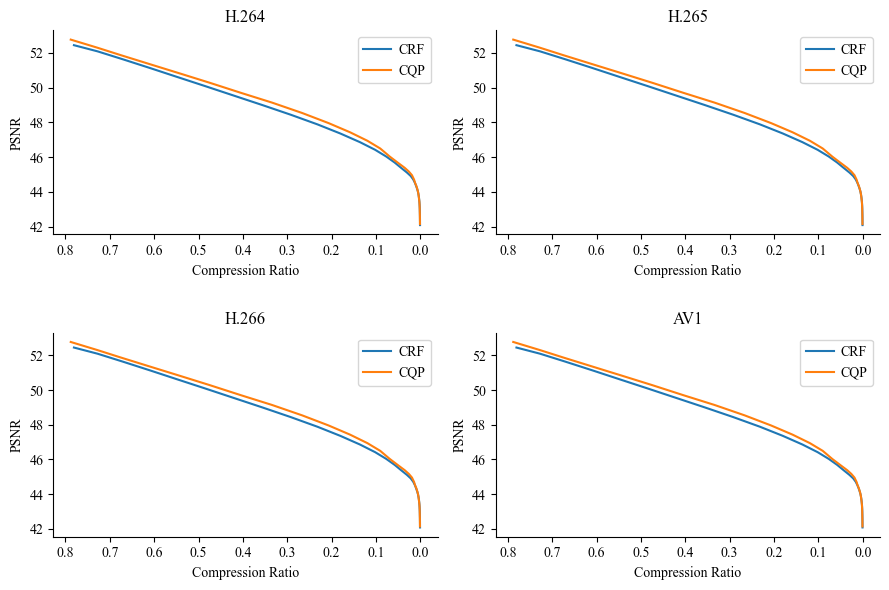

<Figure size 640x480 with 0 Axes>

In [23]:
# psnr 图 1
lang.add_map(LangType.zh_cn,{
        'compression_ratio':'压缩率',
        'psnr':'PSNR',
    }).add_map(LangType.en_us,{
        'compression_ratio':'Compression Ratio',
        'psnr':'PSNR',
    })

def get_x_y(codec,mode):
    compression_strengths = range(0,36)
    x = list()
    y = list()
    for compression_strength in compression_strengths:
        df_compression_ratios = pd.read_excel('out/compression_ratios.xlsx', sheet_name=f'{codec}_{mode}_{compression_strength}')
        x.append(df_compression_ratios.iloc[0,:].to_numpy().mean())
        df_psnr = pd.read_excel('out/psnr.xlsx', sheet_name=f'{codec}_{mode}_{compression_strength}')
        y.append(df_psnr.to_numpy().mean())
    return x,y


x_h264_crf,y_h264_crf = get_x_y('h264','crf')
x_h264_qp,y_h264_qp = get_x_y('h264','qp')

fig, axes = plt.subplots(2, 2, figsize=(9, 6))
def draw(data_1,data_2,row,cal,title):
    ax = axes[row,cal]
    ax.invert_xaxis()
    ax.plot(data_1[0],data_1[1],label='CRF')
    ax.plot(data_2[0],data_2[1],label='CQP')
    ax.set_title(title)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xlabel(t('compression_ratio'))
    ax.set_ylabel(t('psnr'))
    ax.legend(handlelength=2, handletextpad=0.5)

draw((x_h264_crf,y_h264_crf),(x_h264_qp,y_h264_qp),0,0,'H.264')
draw((x_h264_crf,y_h264_crf),(x_h264_qp,y_h264_qp),0,1,'H.265')
draw((x_h264_crf,y_h264_crf),(x_h264_qp,y_h264_qp),1,0,'H.266')
draw((x_h264_crf,y_h264_crf),(x_h264_qp,y_h264_qp),1,1,'AV1')


plt.tight_layout(h_pad=2.5)

plt.savefig(f"{outdir}/psnr_avg.svg",transparent=True)
# 显示图表
plt.show()
plt.clf()


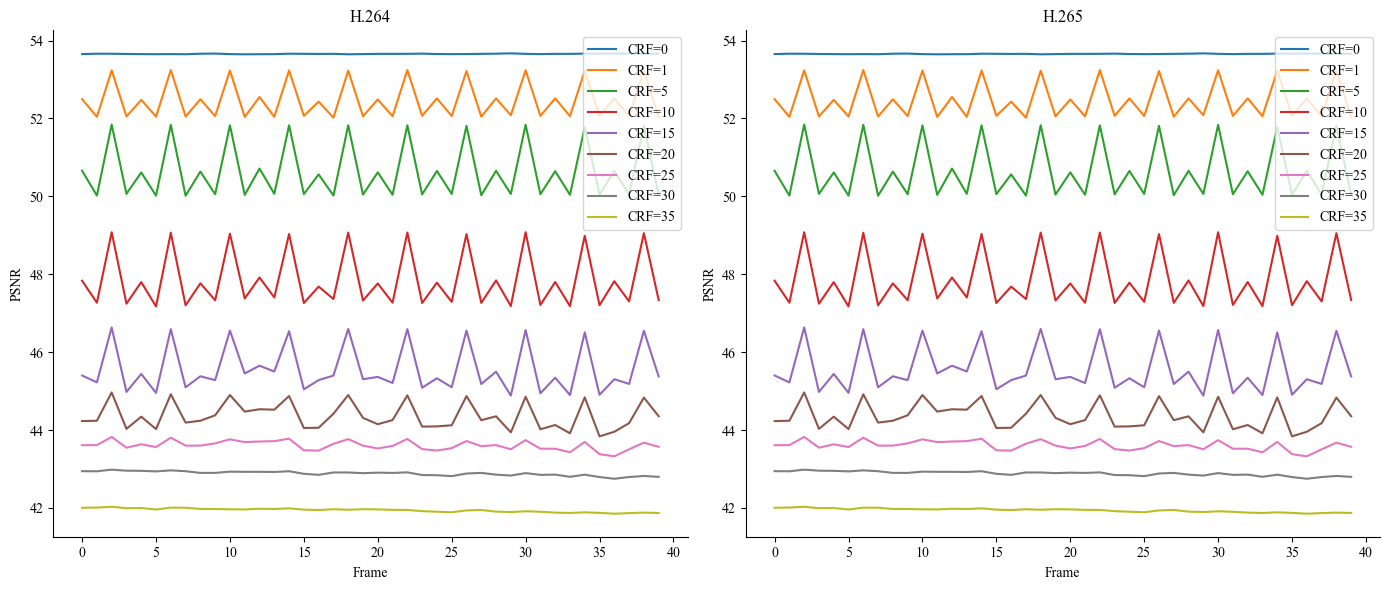

<Figure size 640x480 with 0 Axes>

In [38]:
# psnr 图 2
lang.add_map(LangType.zh_cn,{
        'compression_ratio':'压缩率',
        'psnr':'PSNR',
    }).add_map(LangType.en_us,{
        'compression_ratio':'Compression Ratio',
        'psnr':'PSNR',
    })


codec = 'h264'
compression_strengths = [0,1,5,10,15,20,25,30,35]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
codecs = ['h264','h264']
titles = ['H.264','H.265']
for i,codec in enumerate(codecs):
    ax = axes[i]
    for compression_strength in compression_strengths:
        df_psnr = pd.read_excel('out/psnr.xlsx', sheet_name=f'{codec}_crf_{compression_strength}')
        data = df_psnr.iloc[50:90,0].to_numpy()
        ax.plot(data,label=f'CRF={compression_strength}')
    ax.set_title(titles[i])
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xlabel(t('Frame'))
    ax.set_ylabel(t('PSNR'))
    # ax.set_xticks(range(0,46,5))
    # ax.legend(handlelength=2, handletextpad=0.5)
    ax.legend(loc='upper right')

plt.tight_layout(h_pad=2.5)

plt.savefig(f"{outdir}/psnr.svg",transparent=True)
# 显示图表
plt.show()
plt.clf()
